In [36]:
%load_ext autoreload
%autoreload 2
from sgtaxidata import *
DBNAME='../taxis.db'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
dates=taxis.get_dates(DBNAME)
dates

['20170624',
 '20170625',
 '20170626',
 '20170627',
 '20170628',
 '20170629',
 '20170630',
 '20170701',
 '20170702',
 '20170703',
 '20170704',
 '20170705',
 '20170706',
 '20170707',
 '20170708']

In [52]:
lat,lon=analysis.get_lat_long("Changi Airport")
print lat,lon

1.3644202 103.9915308


In [53]:
data=[analysis.get_weekday_data(date,DBNAME,lat,lon,holidays=['20170626']) for date in dates]
data=[x for x in data if x is not None]

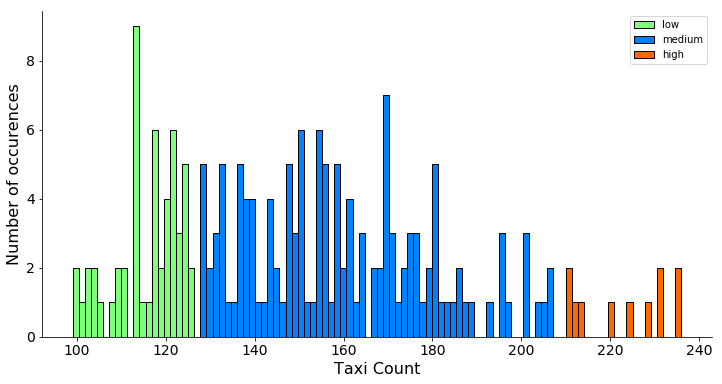

In [54]:
d=data[4]
visualize.plot_hist(d['TaxiCount'])